In [1]:
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [99]:
from wave1d import Wave, StaggeredWave

gpts = 100
width = 100.
steps = 1000
dt = 0.1

wave = Wave(gpts, width)
swave = StaggeredWave(gpts, width)

#wave.eta = np.exp(-(50-wave.x)**2/10**2)
# swave.eta = np.exp(-(50-swave.x)**2/10**2)

ETA, VEL = wave.simulate(steps, dt)
SETA, SVEL = swave.simulate(steps, dt)

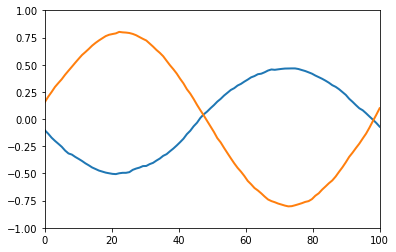

In [100]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML


# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()
x = np.linspace(0, width, gpts)

ax.set_xlim(( 0, 100))
ax.set_ylim((-1, 1))

line, = ax.plot([], [], lw=2)
line2, = ax.plot([], [], lw=2)




# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    line2.set_data([], [])
    return (line, line2)



# animation function. This is called sequentially
def animate(i):
    line.set_data(x, ETA[i])
    line2.set_data(x, SETA[i])
    return (line, line2)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=steps, interval=20, blit=True)

HTML(anim.to_html5_video())

In [102]:
from wave1d import StaggeredWaveVector

gpts = 100
width = 100.
steps = 1000
dt = 0.1

wave = StaggeredWaveVector(gpts, width)
# wave.eta = np.exp(-(50-wave.x)**2/10**2)
# wave.eta = np.pad(wave.eta, 1, mode='wrap')

ETA, VEL = wave.simulate(steps, dt)

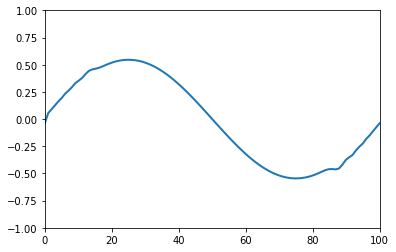

In [104]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()
x = np.linspace(0, width, gpts)

ax.set_xlim(( 0, 100))
ax.set_ylim((-1, 1))

line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)



# animation function. This is called sequentially
def animate(i):
    line.set_data(x, ETA[i])
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=20, blit=True)

HTML(anim.to_html5_video())